### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [2]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

## TOKENIZATION

### Play Code

In [3]:
# Import string library
import string

In [4]:
# Visualize
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# Testing maketrans for replacing upper case letters with lower case
x = 'A'
y = 'a'
txt = 'AbaA'

new = str.maketrans(x, y)
print(txt.translate(new))

abaa


### Part I

In [6]:
# Get a string of lower and upper case letters (to replce)
lower = string.ascii_lowercase
upper = string.ascii_uppercase

# Design translation
upper_to_lower = str.maketrans(upper, lower)

In [7]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        # Remove non-ASCII characters from each line
        for char in line:
            if char in string.punctuation:
                line = line.replace(char, '')
            line = line.translate(upper_to_lower)

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

In [8]:
# Print Results
nitem = 0 ; maxitems = 10
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break

('\ufeffthe', 1)
('project', 85)
('gutenberg', 26)
('ebook', 13)
('of', 4532)
('life', 89)
('on', 947)
('the', 9252)
('mississippi', 159)
('this', 778)


### Part II

In [51]:
# Create a sorted dictionary of the most frequently used words
most_frequent = {key: val for key,val in sorted(wdict.items(), key=lambda item: item[1], reverse=True)}

In [43]:
# Total number of words used
total_num_words = len(most_frequent)
print("Total Number of Words Used: ", total_num_words)

total_num_occ = sum(most_frequent.values())
print("Total Number of Occurences: ", total_num_occ)

# The top 100 most used words
(list(most_frequent.items())[:100])

Total Number of Words Used:  14582
Total Number of Occurences:  147424


[('the', 9252),
 ('and', 5890),
 ('of', 4532),
 ('a', 4052),
 ('to', 3592),
 ('in', 2591),
 ('it', 2287),
 ('i', 2200),
 ('was', 2093),
 ('that', 1720),
 ('he', 1401),
 ('is', 1147),
 ('for', 1095),
 ('with', 1081),
 ('you', 1032),
 ('his', 961),
 ('had', 961),
 ('but', 952),
 ('on', 947),
 ('as', 881),
 ('this', 778),
 ('they', 758),
 ('at', 750),
 ('not', 721),
 ('all', 720),
 ('by', 713),
 ('one', 686),
 ('there', 627),
 ('were', 625),
 ('be', 616),
 ('my', 582),
 ('or', 581),
 ('from', 577),
 ('have', 571),
 ('out', 541),
 ('so', 535),
 ('up', 529),
 ('him', 523),
 ('we', 519),
 ('me', 515),
 ('when', 505),
 ('would', 478),
 ('which', 476),
 ('river', 457),
 ('an', 439),
 ('them', 424),
 ('no', 422),
 ('then', 404),
 ('said', 399),
 ('are', 387),
 ('if', 381),
 ('their', 378),
 ('now', 368),
 ('about', 346),
 ('time', 337),
 ('been', 335),
 ('down', 327),
 ('its', 322),
 ('could', 313),
 ('has', 304),
 ('will', 301),
 ('into', 300),
 ('what', 284),
 ('her', 278),
 ('two', 273),
 ('

In [26]:
# Find how many words is about 90% of the total occurences
num_words90 = round(0.9*total_num_occ)
print(num_words90)

132682


In [50]:
count = 0
num_words = 0
# Loop through dictionary and sum occurences
for word, occ in most_frequent.items():
  num_words = num_words + 1
  count = count + occ

  # If we reach 90% of used words, stop
  if count > num_words90:
    break

In [49]:
print('The first {} words make up 90% of total {} occurences' .format(num_words, count))

The first 3781 words make up 90% of total 132684 occurences


## EMBEDDING

In [64]:
import numpy as np
import torch

In [66]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()

# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The vocabulary size is:  30522


In [67]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)

(30522, 1024)


In [68]:
# Read in the vocabulary
words = np.array([])
for word in wdict.items():
    words = np.append(word[0],words)

In [69]:
print(len(words))

14582


In [87]:
# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
char_indices_to_use = np.arange(800, 1000, 1)
voc_indices_to_plot = np.append(char_indices_to_use, np.arange(800, 2000, 1))
voc_indices_to_use = np.append(char_indices_to_use, np.arange(1000, 800, 1))

voc_indices_to_use_tensor = torch.LongTensor(voc_indices_to_use)
word_embs_to_use = wordembs(voc_indices_to_use_tensor).detach().numpy()
words_to_plot = words[voc_indices_to_plot]


print(len(voc_indices_to_plot))
print(len(voc_indices_to_use))

1400
200


In [82]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=8,verbose=1,metric='cosine',init='pca',n_iter=2000)
word_embs_to_use_tsne = mytsne_words.fit_transform(word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2700 samples in 0.002s...
[t-SNE] Computed neighbors for 2700 samples in 0.458s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2700
[t-SNE] Computed conditional probabilities for sample 2000 / 2700
[t-SNE] Computed conditional probabilities for sample 2700 / 2700
[t-SNE] Mean sigma: 0.143462
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.842758
[t-SNE] KL divergence after 2000 iterations: 1.520816


<function matplotlib.pyplot.show(close=None, block=None)>

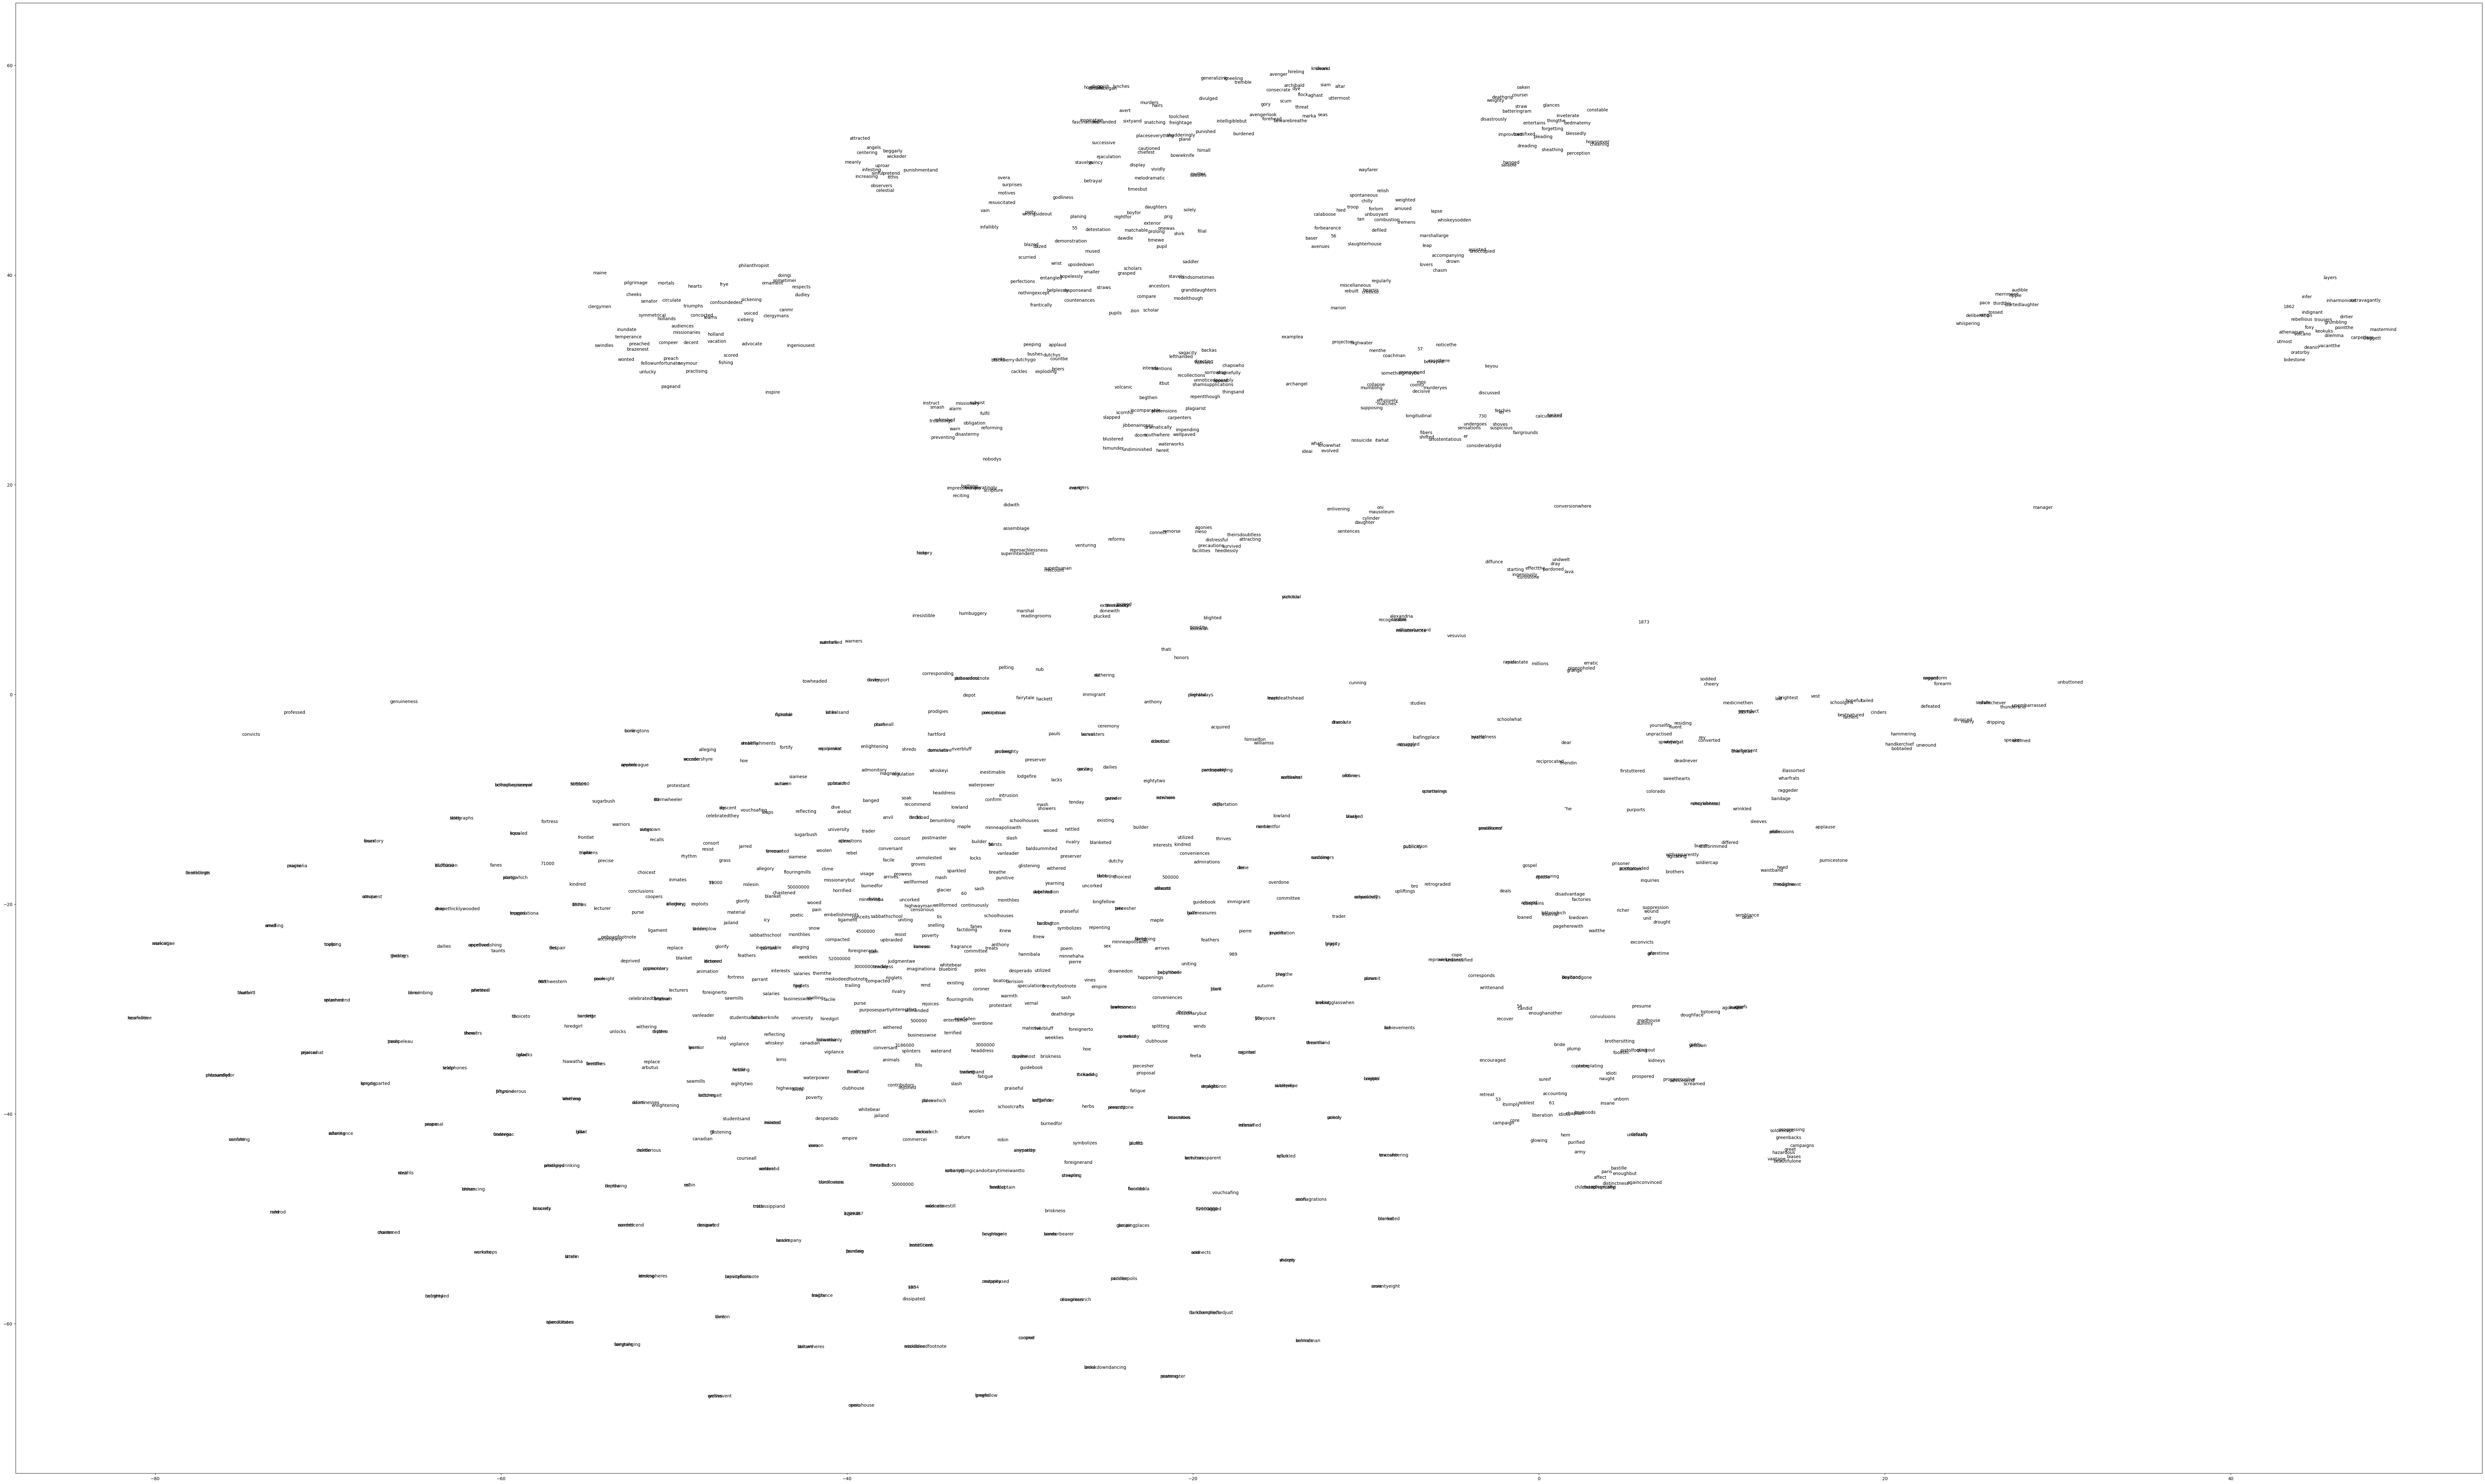

In [88]:
# Plot the transformed embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(words_to_plot):
    plt.scatter(word_embs_to_use_tsne[i,0], word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(word_embs_to_use_tsne[i,0], word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)


# Save the plot before adjusting.
plt.savefig('hw4-tsne10.pdf', format='pdf')

plt.show